## 한글 자연어 처리기초 KoNLPy 및 필요 모듈의 설치

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## 한글 자연어 처리 기초

In [2]:
from konlpy.tag import Kkma
kkma = Kkma()

In [3]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [4]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [5]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [6]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [7]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [8]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [9]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [10]:
from konlpy.tag import Okt
t = Okt()

In [11]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [12]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [13]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

## 워드 클라우드

In [14]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np

from PIL import Image

In [15]:
text = open('./alice.txt').read()
alice_mask = np.array(Image.open('./alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add('said')

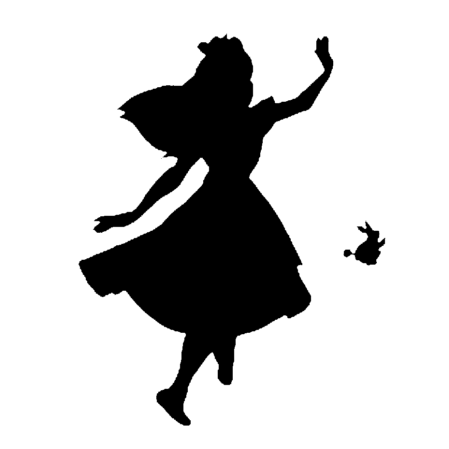

In [16]:
import matplotlib.pyplot as plt
import platform

from matplotlib import rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')

%matplotlib inline

plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)
wc = wc.generate(text)

wc.words_

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

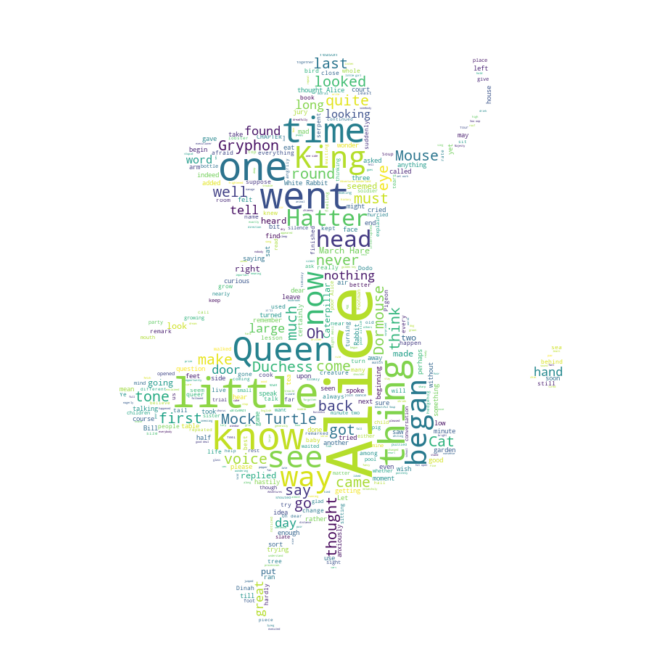

In [18]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
text = open('./a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('./stormtrooper_mask.png'))

In [20]:
stopwords = set(STOPWORDS)
stopwords.add('int')
stopwords.add('ext')

In [21]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [22]:
import random

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60, 100)

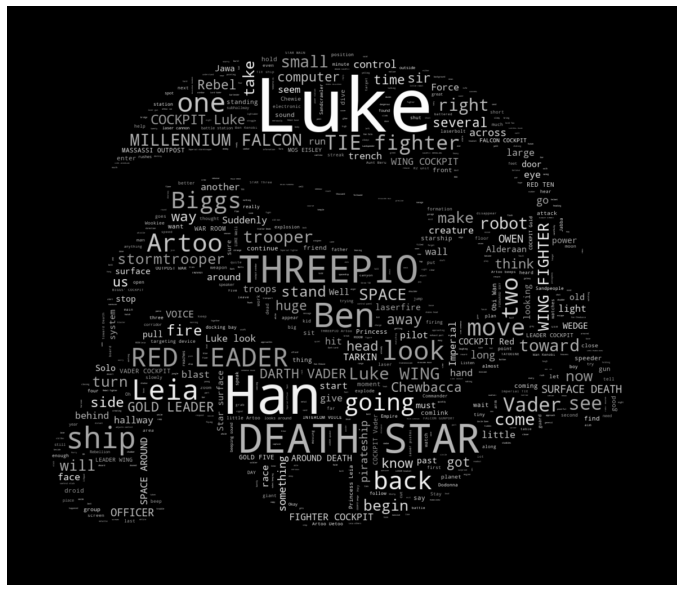

In [23]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis('off')
plt.show()

## 육아휴직 관련 법안에 대한 분석

In [24]:
from konlpy.corpus import kobill

files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [25]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [26]:
t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [27]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [28]:
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

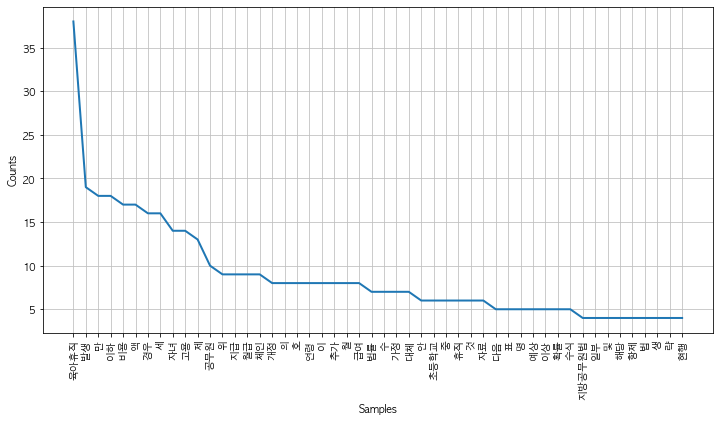

In [29]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [30]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', 'x', '의', '자', '에', '안', '번', '호', '을', '이', '다', '만', '로', '가', '를']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

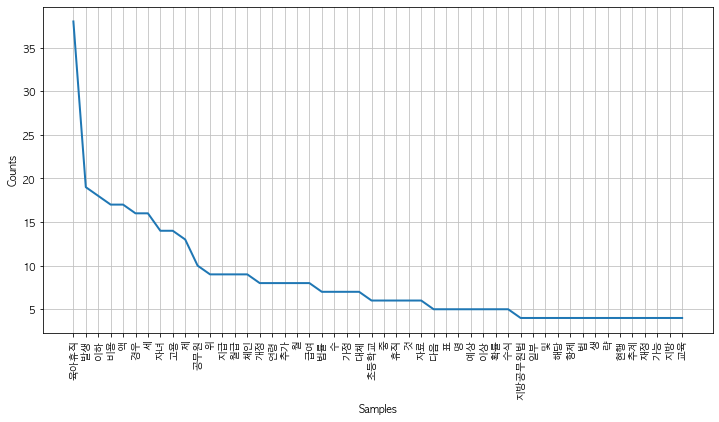

In [31]:
ko = nltk.Text(ko, name='대한민국 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [32]:
ko.count('초등학교')

6

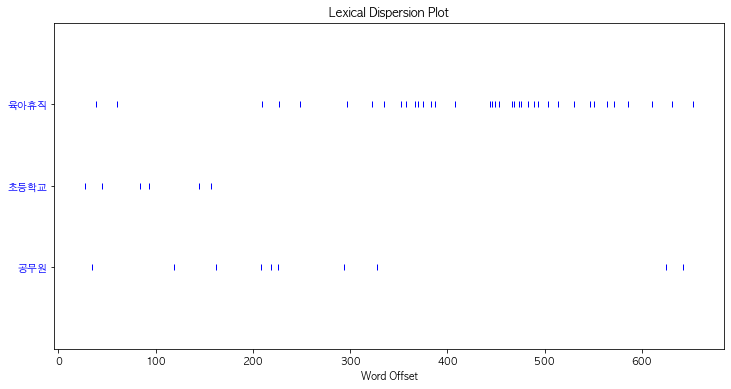

In [33]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [34]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


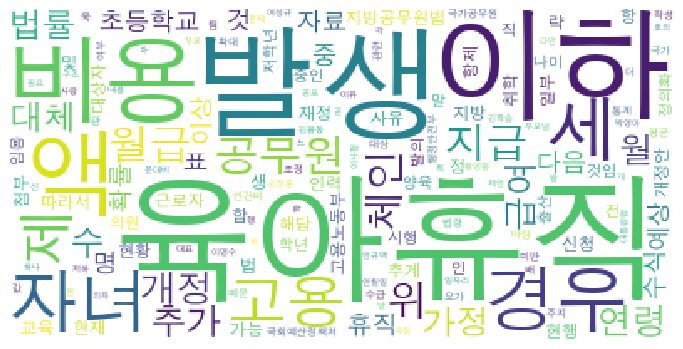

In [35]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',relative_scaling=0.2, background_color='white').generate_from_frequencies(dict(data))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Naive Bayes Classifier의 이해 - 영문

In [36]:
from nltk.tokenize import word_tokenize

In [37]:
train = [('i like you', 'pos'),
        ('i hate you', 'neg'),
        ('you like me', 'neg'),
        ('i like her', 'pos')]

In [38]:
all_words = set(word.lower() for sentence in train
                               for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [39]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                for x in train]

t

[({'you': True,
   'her': False,
   'hate': False,
   'i': True,
   'me': False,
   'like': True},
  'pos'),
 ({'you': True,
   'her': False,
   'hate': True,
   'i': True,
   'me': False,
   'like': False},
  'neg'),
 ({'you': True,
   'her': False,
   'hate': False,
   'i': False,
   'me': True,
   'like': True},
  'neg'),
 ({'you': False,
   'her': True,
   'hate': False,
   'i': True,
   'me': False,
   'like': True},
  'pos')]

In [40]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                     you = True              neg : pos    =      1.7 : 1.0
                    hate = False             pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0


In [41]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower(): (word in word_tokenize(test_sentence.lower())) for word in all_words}

test_sent_features

{'you': False,
 'her': False,
 'hate': False,
 'i': True,
 'me': False,
 'like': True}

In [42]:
classifier.classify(test_sent_features)

'pos'

## Naive Bayes Classifier의 이해 - 한글

In [43]:
pos_tagger = Okt()

In [44]:
train = [('메리가 좋아', 'pos'),
        ('고양이도 좋아', 'pos'),
        ('난 수업이 지루해', 'neg'),
        ('메리는 이쁜 고양이야', 'pos'),
        ('난 마치고 메리랑 놀거야', 'pos')]

In [45]:
all_words = set(word.lower() for sentence in train
                               for word in word_tokenize(sentence[0]))

all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [46]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                for x in train]

t

[({'메리는': False,
   '좋아': True,
   '수업이': False,
   '이쁜': False,
   '고양이야': False,
   '마치고': False,
   '메리랑': False,
   '놀거야': False,
   '난': False,
   '메리가': True,
   '고양이도': False,
   '지루해': False},
  'pos'),
 ({'메리는': False,
   '좋아': True,
   '수업이': False,
   '이쁜': False,
   '고양이야': False,
   '마치고': False,
   '메리랑': False,
   '놀거야': False,
   '난': False,
   '메리가': False,
   '고양이도': True,
   '지루해': False},
  'pos'),
 ({'메리는': False,
   '좋아': False,
   '수업이': True,
   '이쁜': False,
   '고양이야': False,
   '마치고': False,
   '메리랑': False,
   '놀거야': False,
   '난': True,
   '메리가': False,
   '고양이도': False,
   '지루해': True},
  'neg'),
 ({'메리는': True,
   '좋아': False,
   '수업이': False,
   '이쁜': True,
   '고양이야': True,
   '마치고': False,
   '메리랑': False,
   '놀거야': False,
   '난': False,
   '메리가': False,
   '고양이도': False,
   '지루해': False},
  'pos'),
 ({'메리는': False,
   '좋아': False,
   '수업이': False,
   '이쁜': False,
   '고양이야': False,
   '마치고': True,
   '메리랑': True,
   '놀거야': True,
   '난': True,
   '메리가': Fa

In [47]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0


In [48]:
test_sentence = '난 수업이 마치만 메리랑 놀거야'
test_sent_features = {word.lower(): (word in word_tokenize(test_sentence.lower())) for word in all_words}

test_sent_features

{'메리는': False,
 '좋아': False,
 '수업이': True,
 '이쁜': False,
 '고양이야': False,
 '마치고': False,
 '메리랑': True,
 '놀거야': True,
 '난': True,
 '메리가': False,
 '고양이도': False,
 '지루해': False}

In [49]:
classifier.classify(test_sent_features)

'neg'

In [50]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [51]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [52]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [53]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [54]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [55]:
classsifier = nltk.NaiveBayesClassifier.train(train_xy)

In [56]:
test_sentence = [('난 수업이 마치면 메리랑 놀거야')]

In [57]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [58]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [59]:
classifier.classify(test_sent_features)

'pos'

## 문장의 유사도 측정하기

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
vectorizer = CountVectorizer(min_df=1)

In [62]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
           '메리는 공원에서 산책하고 노는 것을 싫어해요',
           '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
           '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [63]:
x = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '여행을',
 '이상해요',
 '있어요']

In [64]:
t = Okt()

In [65]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떻하죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해요', '.', '이상해요', '.'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은데',
  '너무',
  '바빠서',
  '그러질',
  '못',
  '하고',
  '있어요']]

In [66]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

In [67]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [68]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [69]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]])

In [70]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

In [71]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [72]:
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]])

In [73]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [74]:
best_doc = None
best_dist = 65535
best_i = None

In [75]:
for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print('== Post %i with dist=%.2f   : %s'%(i,d,contents[i]))
    
    if d < best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=3.00   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.00   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [76]:
print('Best post is %i, dist = %.2f'%(best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [77]:
for i in range(0, len(contents)):
    print(x.getrow(i).toarray())
print('----------')
print(new_post_vec.toarray())

[[0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0]]
[[0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0]]
[[1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0]]
[[0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1]]
----------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


In [78]:
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

In [79]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print('== Post %i with dist=%.2f   : %s'%(i,d,contents[i]))
    
    if d < best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=1.28   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=0.42   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=0.89   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.30   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [80]:
print('Best post is %i, dist = %.2f'%(best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [81]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log(float(len(D)) / (len([doc for doc in D if t in doc])))
    return tf,idf

In [82]:
a, abb, abc = ['a'], ['a', 'b', 'b'], ['a', 'b', 'c']
D = [a, abb, abc]

print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

(1.0, 0.0)
(0.6666666666666666, 0.4054651081081644)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.4054651081081644)
(0.3333333333333333, 1.0986122886681098)


In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [84]:
contents_tokens = [t.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    contents_for_vectorize.append(sentence)
    
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [85]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [86]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요.']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 근처 공원 에 메리 랑 놀러 가고 싶네요 .']

In [87]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print('== Post %i with dist=%.2f   : %s'%(i,d,contents[i]))
    
    if d < best_dist:
        best_dist = d
        best_i = i
        
print('Best post is %i, dist = %.2f'%(best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

== Post 0 with dist=0.90   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.18   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=1.16   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.41   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 0, dist = 0.90
--> ['근처 공원에 메리랑 놀러가고 싶네요.']
----> 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?


## 여자친구 선물 고르기

In [88]:
plt.rcParams['axes.unicode_minus'] = False

from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

In [90]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'

html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))

soup = BeautifulSoup(response, 'html.parser')

tmp = soup.find_all('dl')

In [91]:
tmp_list = []

for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    동작감지 vx1   유인나 시계   파니니백   토파즈 반지   까르벵   여친 생일선물   까르벵 시계   마크제이콥스 데이지     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  생리기간 여친선물 줄만한거   2018.12.18.   여친이 생리기간만 되면 너무 힘들어하는데 그럴때 줄만한 여친선물 있을까요ㅠㅠ? 간단한거라도 좋아용..생리기간에 힘내라고 여친선물 주고싶어서요   답변 여친선물 되게 다양하게 줄 수 있는데 생리전후에는 단... 제품줘도 여친선물로 괜찮을거 같더라구요! 생리기간엔... 안심하고 여친선물 주기에 좋은걸로 추천해용! 꼭...      ',
 '  질문  빼빼로데이 여친 선물 추천 어떤게 좋을까요?   2018.10.15.   어떻게 선택을 해야 할지를 모르는데 빼빼로데이 여친선물 추천 부탁드립니다. 처음 여친을 사귀는 거라 어떤것을 해야 할지를 모르겠네요.   답변 빼빼로데이 여친 선물 추천 때문에 질문을 주신거 같으신데요.. 찾아보시면은 빼빼로데이 여친 선물 추천 드리고... 빼빼로데이 다가오면은 여친 선물 하려고 준비를 하는...      ',
 '  질문  여친 선물로 꽃   2019.07.24.   여자친구에게 선물로 꽃을 줄려 합니다 무슨 꽃이 좋을까요? 너무 비싼 거 제외해주세요 너무 부담스럽지 않을 만큼이면 좋겠습니다   답변 프리지아 추천합니다 강추 작약 꽃다발 예뻐요! 안녕하세요 수제가죽 브랜드 톰크롬입니다. 여자친구분에게 튤립을 선물하면 좋을것같습니다. 꽃말은 튤립의 꽃말은...      ',
 '  질문  20대중후반 여친선물을 하려고하는데요   2018.11.06

In [92]:
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1, 10000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자친구 선물')))
    
    soup = BeautifulSoup(response, 'html.parser')

    tmp = soup.find_all('dl')
    
    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

In [93]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    여자친구목걸이   스킨케어   여자30대선물   20대여자친구선물   여자친구선물뷰티디바이스   선물   여자친구생일선물   여자근력운동   여자친구100일선물   10대여자친구선물     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  20대 여자친구 선물로 어떤 걸 해줘야 할까요??   2019.06.10.   이번에는 좀 색다른 걸 해주고 싶은데요, 웬만한 20대 여자친구 선물로 해줄건 다... 이미 줄 건 다 줘봤습니다. 20대 여자친구 선물로 실용적인 거 있음 추천해주세요.   답변 20대 여자친구 선물 추천해드릴게요! 저도 20대 여자친구 선물 고르느라 고민을 진짜 많이 했었어요, 워낙 깐깐한... 근데 그런 제 여친이 진~짜 좋아했던 20대 여자친구 선물...      ',
 '  질문  여자친구 선물추천해주세요   2019.07.15.   학생인데 여자친구선물 추천좀여   답변 kr 안녕하세요, 여자친구 선물 때문에 고민이 많으시군요! 여자친구분의 이름을 새긴 스와톡을 선물하면 여자친구분께서 좋아하실 거에요~ 스와톡은...      ',
 '  질문  여자친구 선물 추천 해주실분~~   2019.03.04.   있으면 여친 생일이라서 차근차근 준비 중이에요. 여자친구 선물 추천 받고 준비하려고 합니다. 여친이 좋아할 만한 것들이 있다면 여자친구 선물 추천 해주심 감사드려요!!   답변 남사친들이 여자친구 선물 추천 부탁할 때면 저는 무조건 이거 여자친구 선물 추천하는데 100이면 100 다들 엄청 좋아하더라고요. 그래서 여자친구 선물 추천해드리고...      ',
 '  질문  여자친구 선물추천 

In [94]:
t = Okt()

In [95]:
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [96]:
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '연관검색어',
 '도움말',
 '여자친구',
 '목걸이',
 '스킨',
 '케어',
 '여자',
 '30',
 '대',
 '선물',
 '20',
 '대',
 '여자친구',
 '선물',
 '여자친구',
 '선물',
 '뷰티',
 '디바이스',
 '선물',
 '여자친구',
 '생일',
 '선물',
 '여자',
 '근력',
 '운동',
 '여자친구',
 '100일',
 '선물',
 '10',
 '대',
 '여자친구',
 '선물',
 '닫기',
 '후',
 '1',
 '주',
 '일간',
 '유지',
 '됩니다',
 '.',
 '연관검색어',
 '를',
 '다시',
 '보시겠습니까',
 '?',
 '열기',
 '질문',
 '20',
 '대',
 '여자친구',
 '선물',
 '로',
 '어떤',
 '걸',
 '해줘야',
 '할까',
 '요',
 '??',
 '2019.06',
 '.',
 '10',
 '.',
 '이번',
 '에는',
 '좀',
 '색다른',
 '걸',
 '해주고',
 '싶은데요',
 ',',
 '웬만한',
 '20',
 '대',
 '여자친구',
 '선물',
 '로',
 '해줄건',
 '다',
 '...',
 '이미

In [97]:
ko = nltk.Text(tokens_ko, name='여자친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

630717
381


In [98]:
ko.vocab().most_common(100)

[('선물', 43849),
 ('여자친구', 42319),
 ('.', 31532),
 ('...', 16158),
 ('추천', 15377),
 ('로', 13080),
 ('대', 12304),
 ('20', 10764),
 ('질문', 8459),
 ('거', 8456),
 ('답변', 7693),
 ('을', 6924),
 ('이', 6924),
 ('!', 4614),
 ('걸', 4611),
 ('단어', 3850),
 ('가', 3849),
 ('합니다', 3846),
 ('다', 3845),
 ('고민', 3845),
 ('도', 3842),
 ('것', 3842),
 ('화장품', 3088),
 (',', 3082),
 ('검색', 3080),
 ('한', 3080),
 ('를', 3079),
 ('적', 3079),
 ('의', 3078),
 ('는', 3077),
 ('?', 3077),
 ('좀', 3076),
 ('실용', 3076),
 ('저', 3076),
 ('하는데', 3076),
 ('좋은', 3076),
 ('어떤', 3073),
 ('좋을까요', 3073),
 ('입력', 2310),
 ('하는', 2310),
 ('줄', 2310),
 ('으로', 2310),
 ('때', 2309),
 ('생일', 2308),
 ('해주세요', 2307),
 ('여친', 2307),
 ('2019.07', 2307),
 ('분', 2307),
 ('있으면', 2307),
 ('하려고', 2307),
 ('만', 2307),
 ('들', 2307),
 ('이런', 2307),
 ('뭐', 2307),
 ('틴트', 2307),
 ('12', 2307),
 ('친환경', 2307),
 ('할', 2305),
 ('2019.06', 2304),
 ('면', 2304),
 ('여자', 1543),
 ('요', 1541),
 ('포함', 1540),
 ('연관검색어', 1540),
 ('하나', 1539),
 ('30', 1539),
 ('10'

In [100]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
              '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
              '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
              '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
              '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
              '지','있','못','후','중','줄','6','과','어떤','기본','!!',
              '단어','선물해','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자친구 선물')
ko.vocab().most_common(50)

[('선물', 43849),
 ('여자친구', 42319),
 ('추천', 15377),
 ('!', 4614),
 ('걸', 4611),
 ('합니다', 3846),
 ('고민', 3845),
 ('화장품', 3088),
 ('검색', 3080),
 ('적', 3079),
 ('실용', 3076),
 ('저', 3076),
 ('하는데', 3076),
 ('좋은', 3076),
 ('좋을까요', 3073),
 ('입력', 2310),
 ('생일', 2308),
 ('해주세요', 2307),
 ('여친', 2307),
 ('2019.07', 2307),
 ('분', 2307),
 ('있으면', 2307),
 ('하려고', 2307),
 ('만', 2307),
 ('이런', 2307),
 ('틴트', 2307),
 ('12', 2307),
 ('친환경', 2307),
 ('2019.06', 2304),
 ('면', 2304),
 ('여자', 1543),
 ('포함', 1540),
 ('연관검색어', 1540),
 ('30', 1539),
 ('됩니다', 1539),
 ('??', 1538),
 ('해주고', 1538),
 ('건', 1538),
 ('인', 1538),
 ('진짜', 1538),
 ('스와톡', 1538),
 ('께서', 1538),
 ('에요', 1538),
 ('준비', 1538),
 ('부탁', 1538),
 ('100', 1538),
 ('부탁드립니다', 1538),
 ('보', 1538),
 ('니까', 1538),
 ('안', 1538)]

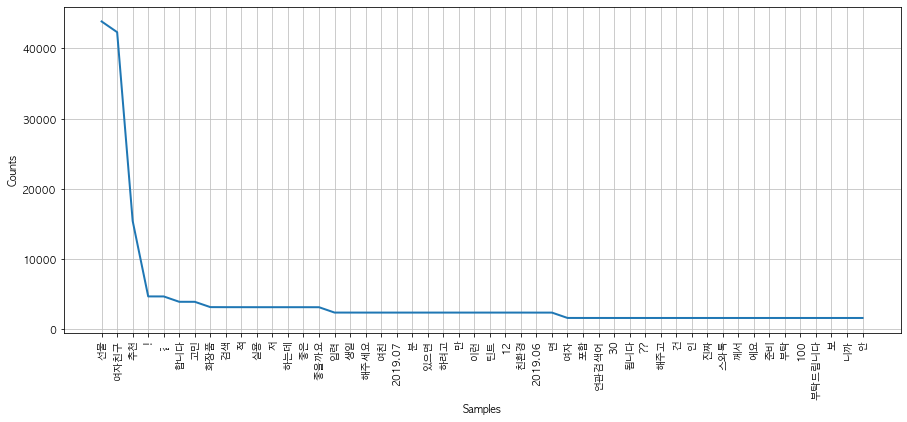

In [101]:
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

In [102]:
from PIL import Image

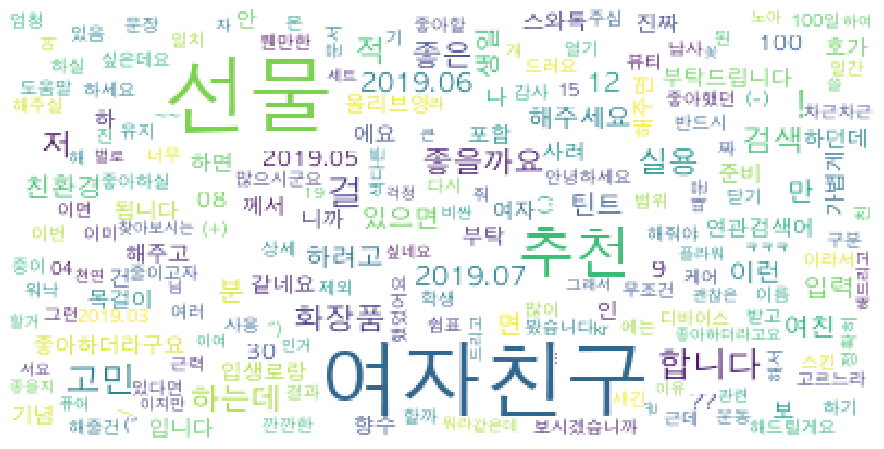

In [105]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                     relative_scaling=0.5,
                     background_color='white').generate_from_frequencies(dict(data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [106]:
mask = np.array(Image.open('./heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [107]:
data = ko.vocab().most_common(200)

data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      relative_scaling=0.1,
                      mask=mask,
                      background_color='white',
                      min_font_size=1,
                      max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

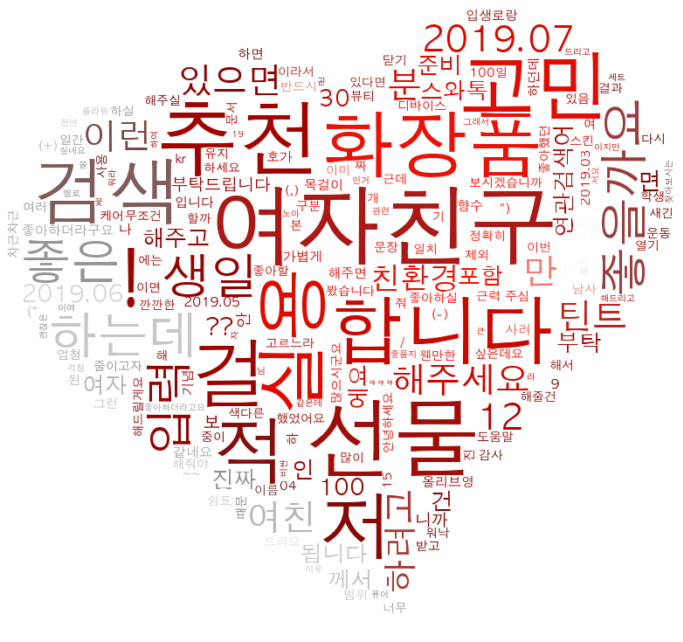

In [108]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

In [109]:
import gensim
from gensim.models import word2vec

In [110]:
twitter = Okt()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    
    r = []
    
    for word in malist:
        if not word[1] in ['Josa', 'Eomi', 'Punctuation']:
            r.append(word[0])
            
    r1 = (' '.join(r)).strip()
    results.append(r1)
    print(r)

['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['질문', '여자친구', '선물', '알다', '2019.01', '04', '간단하다', '여자친구', '선물', '고르다

['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '

['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']

['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자

['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']

['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자

['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자

['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문',

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자

['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문',

['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자

['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '

['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자

['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문',

['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자

['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']

['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '

['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']

['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '

['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품', '좋다', '것좀', '2019.04', '30', '20', '대다', '여자친구', '선물', '친환경', '화장품', '하나', '구입', '해주다', '하다', '건성', '타입', '그러하다', '친환경', '화장품', '좋다', '같다', '20', '대다', '여자친구', '선물', '어떤', '것', '좋다', '답변', '20', '대다', '여자친구', '선물', '줄', '만', '상품', '이', '라면', '크림', '같다', '20', '대다', '여자친구', '선물', '탁월하다', '거', '같다', '어떠하다', '20', '대다', '여자친구', '선물', '사주다', '정말', '보습', '지속', '력', '남다르다']
['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30

['질문', '여자친구', '선물', '가볍다', '사려', '하다', '2019.06', '28', '여자친구', '선물', '가볍다', '사려', '하다', '올리브영', '추천', '좀', '해주다', '만', '원', '이내', '부탁드리다', '답변', '여름', '시원하다', '바디', '미스트', '추천', '하다', '올리브영', '모바일', '메인', 'm.oliveyoung.co.kr', '틴트', '선물', '추천', '하다']
['기본', '검색', '입력', '단어', '하나', '이상', '포함', '되다', '문서', '검색']
['상세', '검색', '정확하다', '일치', '하다', '단어', '문장', '반드시', '포함', '하다', '단어', '제외', '하다', '단어', '기', '본', '검색', '결과', '범위', '줄이다', '하다', '때', '사용', '하다', '여러', '개', '단어', '입력', '하다', '때', '쉼표', '로', '구분', '하다', '입력', '하다']
['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다'

['연관검색어', '도움말', '여자친구', '목걸이', '스킨', '케어', '여자', '30', '대', '선물', '20', '대', '여자친구', '선물', '여자친구', '선물', '뷰티', '디바이스', '선물', '여자친구', '생일', '선물', '여자', '근력', '운동', '여자친구', '100일', '선물', '10', '대', '여자친구', '선물', '닫다', '후', '1', '주', '일간', '유지', '되다', '연관검색어', '다시', '보다', '열기']
['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '20', '대다', '여자친구', '선물', '어떻다', '걸', '해주다', '하다', '요', '2019.06', '10', '이번', '좀', '색다르다', '걸', '해주다', '싶다', '웬만하다', '20', '대다', '여자친구', '선물', '해주다', '다', '이미', '줄', '건', '다', '주다', '보다', '20', '대다', '여자친구', '선물', '실용', '적', '거', '있다', '추천', '해주다', '답변', '20', '대다', '여자친구', '선물', '추천', '해드리다', '저', '20', '대다', '여자친구', '선물', '고르다', '고민', '진짜', '많이', '하다', '워낙', '깐깐하다', '근데', '그렇다', '제', '여친', '진', '짜다', '좋아하다', '20', '대다', '여자친구', '선물']
['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '10

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '추천', '해주다', '2019.07', '15', '학생', '여자친구', '선물', '추천', '좀', '답변', 'kr', '안녕하다', '여자친구', '선물', '때문', '고민', '많다', '여자친구', '분', '이름', '새기다', '스와톡', '선물', '하다', '여자친구', '분', '좋아하다', '거', '스와톡']
['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['

['질문', '여자친구', '선물', '추천', '해주다', '분', '2019.03', '04', '있다', '여친', '생일', '차근차근', '준비', '중이', '여자친구', '선물', '추천', '받다', '준비', '하다', '하다', '여친', '좋아하다', '만', '것', '들', '있다', '여자친구', '선물', '추천', '해', '주심', '감사', '드리다', '답변', '남사', '친', '들', '여자친구', '선물', '추천', '부탁', '하다', '때', '저', '무조건', '이', '거', '여자친구', '선물', '추천', '하다', '100', '이면', '100', '다', '들다', '엄청', '좋아하다', '그래서', '여자친구', '선물', '추천', '해드리다']
['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '

['질문', '여자친구', '선물', '추천', '실용', '적', '요', '2019.07', '19', '여자친구', '선물', '추천', '실용', '적', '거', '부탁드리다', '꽃', '이렇다', '건', '보', '별로', '안', '좋아하다', '진짜', '쓸다', '수', '있다', '실용', '적', '하다', '괜찮다', '여자친구', '선물', '추천', '부탁', '하다', '답변', '저', '여자친구', '선물', '추천', '노아', '퓨어', '플라워', '것', '여자친구', '선물', '추천', '하', '크다', '이유', '이다', 'ㅋㅋㅋ', '천연', '화장품', '세트', '여자친구', '선물', '추천', '드리다', '싶다']
['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다',

['질문', '여자친구', '선물', '뭐', '좋다', '2019.05', '08', '곧', '있다', '여자친구', '생일', '서요', '여자친구', '선물', '어떤', '걸', '해주다', '좋다', '고민', '걱정', '되다', '비싸다', '걸', '해주다', '여자친구', '뭐라다', '하다', '같다', '여자친구', '선물', '뭐', '좋다', '답변', '질문', '자', '님', '여자친구', '선물', '관련', '하다', '찾아보다', '해주다', '여자친구', '선물', '알다', '드리다', '하다', '평소', '것', '여자친구', '선물', '해주다', '싶다', '알아보다', '보다']
['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문',

['질문', '여자친구', '선물', '뭐', '주다', '게', '좋다', '2019.05', '16', '얼마', '안', '있다', '기념일', '여자친구', '선물', '줄', '거', '찾다', '있다', '막', '다이소', '이렇다', '데', '여자친구', '선물', '받다', '좋다', '거', '써다', '줄다', '웬만하다', '여자친구', '직접', '선물', '하다', '답변', '여자친구', '선물', '고민', '하다', '거', '좋다', '거', '저', '예전', '여자친구', '선물', '주다', '거', '너무', '좋아하다', '또', '여자친구', '선물', '드리다', '거', '보', '부작용', '효과', '이렇다', '게']
['질문', '입생로랑', '틴트', '여자친구', '선물', '하다', '하', '2019.07', '08', '입생로랑', '틴트', '여자친구', '선물', '하다', '하다', '좀', '연', '한', '색', '바르다', '같다', '가장', '인기', '많다', '9', '12', '호', '하다', '9', '호보', '12', '호가', '연하다', '하다', '맞다', 'ㅠㅠ', '답변', '12', '호가', '나다', '것', '같다']
['질문', '여자친구', '선물', '추천', '2019.06', '25', '50일', '기념', '이자', '첫', '정식', '데이트', '어떤', '걸', '선물', '하다', '좋다', '두다', '20', '대다', '초반', '대학생', '이다', '답변', '일단', '꽃다발', '피다', 'ㅎ', '목걸이', '팔찌', '향수', '좋다', '거', '같다', '기념', '선물', '고민', '계시다', '은은하다', '향기', '선물', '하다', '수', '있다', '니', '치', '섬유', '향수', '괜찮다', '것', '같다']
['질문', '20', '대다', '여자친구', '선물', '친환경', '화장품',

In [113]:
data_file = 'pres_girl.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write('\n'.join(results))

In [114]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, min_count=2, sg=1)

model.save('pres_girl.model')

In [115]:
model = word2vec.Word2Vec.load('pres_girl.model')

In [116]:
model.most_similar(positive=['선물'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('여자친구', 0.5953950881958008),
 ('고민', 0.2686563730239868),
 ('개인', 0.25853973627090454),
 ('중', 0.2515345811843872),
 ('2019.01', 0.24911217391490936),
 ('거', 0.24779558181762695),
 ('모르다', 0.23941048979759216),
 ('20', 0.2381971776485443),
 ('간단하다', 0.23769691586494446),
 ('학생', 0.23351967334747314)]

In [117]:
model.most_similar(positive=['여자친구'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('선물', 0.5953950881958008),
 ('개인', 0.3423466980457306),
 ('중', 0.3169925808906555),
 ('모르다', 0.313906729221344),
 ('생일', 0.29727184772491455),
 ('간단하다', 0.2929757535457611),
 ('순', 0.2913471758365631),
 ('2019.01', 0.27734091877937317),
 ('가방', 0.27048158645629883),
 ('보통', 0.26197725534439087)]

In [119]:
model.most_similar(positive=['목걸이'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('케어', 0.5289449691772461),
 ('스킨', 0.5269671678543091),
 ('여자', 0.4975188076496124),
 ('도움말', 0.47249916195869446),
 ('대', 0.46667009592056274),
 ('뷰티', 0.45893967151641846),
 ('팔찌', 0.455189973115921),
 ('디바이스', 0.4550017714500427),
 ('향수', 0.42220035195350647),
 ('계시다', 0.3838622570037842)]

In [121]:
model.most_similar(positive=['목걸이'], negative=['여자친구'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('팔찌', 0.37147289514541626),
 ('향수', 0.3334106206893921),
 ('계시다', 0.28120845556259155),
 ('스킨', 0.2671286463737488),
 ('꽃다발', 0.26488083600997925),
 ('케어', 0.26470041275024414),
 ('은은하다', 0.25711292028427124),
 ('향기', 0.24436086416244507),
 ('피다', 0.23612603545188904),
 ('기념', 0.22655488550662994)]